<img src="Logo_IT_ACademy.jpg" alt="Texto alternativo" style="float:right; width:200px;">

<div class="alert alert-block alert-info"><font size="5"><center><b>Análisis del parque automovilístico de Barcelona</u></b></left></font>

<div class="alert alert-block alert-info"><font size="5"><center><b><u>Predicciones</u></b></center></font>
    
$%$       
\begin{align*}Ricard\:Simonneau\end{align*}

\begin{align*}Data\hspace{2mm}Science\hspace{2mm}Student\ - IT\hspace{2mm}Academy\end{align*}

\begin{align*}Date : June\hspace{2mm}2023\end{align*}</div>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder



### Predicciones

Para tratar de realizar predicciones sobre la evolución del número de turismos en Barcelona, utilizaremos un nuevo dataset, generado a partir de los datos ya creados. Crearemos una variable 'Total_turismes'.

Con el nuevo dataset, tratremos de aplicar Algoritmos de Aprendizaje Supervisado para generar un modelo que nos permita predecir mejor la pregunta planteada.


### Objetivo

Crear un modelo que nos permita obtener el total de turimos por año y barrio en función de su antigüedad

--------------------------------------------------------------------------------------------------------------------------------

#### Nuevo Dataset:

- Generamos un nuevo dataset (BCN_Turismos) con los datos de:

    - Antigüedad_tipo_TOTAL.csv


In [9]:
# Iniciamos generando el nuevo DF a partir del dataset 'Antigüedad_tipo_TOTAL.csv'

Antigüedad_tipo_New_df = pd.read_csv('Antigüedad_tipo_TOTAL.csv')

Antigüedad_tipo_New_df



,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Tipus_Vehicles,Antiguitat,Nombre
0,2019,1,Ciutat Vella,1,el Raval,1,Turismes,Menys d'un any d'antiguitat,19
1,2019,1,Ciutat Vella,1,el Raval,1,Turismes,1 any,10
2,2019,1,Ciutat Vella,1,el Raval,1,Turismes,2 anys,19
3,2019,1,Ciutat Vella,1,el Raval,1,Turismes,3 anys,17
4,2019,1,Ciutat Vella,1,el Raval,1,Turismes,4 anys,19
...,...,...,...,...,...,...,...,...,...
157443,2021,10,Sant Martí,73,la Verneda i la Pau,143,Camions,Més de 20 anys,3
157444,2021,10,Sant Martí,73,la Verneda i la Pau,143,Altres vehicles,Menys d'un any d'antiguitat,1
157445,2021,10,Sant Martí,73,la Verneda i la Pau,143,Altres vehicles,6 anys,1
157446,2021,10,Sant Martí,73,la Verneda i la Pau,143,Altres vehicles,D'11 a 20 anys,2


In [10]:
Antigüedad_tipo_New_df = Antigüedad_tipo_New_df.replace("'", "", regex=True)

Antigüedad_tipo_New_df

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Tipus_Vehicles,Antiguitat,Nombre
0,2019,1,Ciutat Vella,1,el Raval,1,Turismes,Menys dun any dantiguitat,19
1,2019,1,Ciutat Vella,1,el Raval,1,Turismes,1 any,10
2,2019,1,Ciutat Vella,1,el Raval,1,Turismes,2 anys,19
3,2019,1,Ciutat Vella,1,el Raval,1,Turismes,3 anys,17
4,2019,1,Ciutat Vella,1,el Raval,1,Turismes,4 anys,19
...,...,...,...,...,...,...,...,...,...
157443,2021,10,Sant Martí,73,la Verneda i la Pau,143,Camions,Més de 20 anys,3
157444,2021,10,Sant Martí,73,la Verneda i la Pau,143,Altres vehicles,Menys dun any dantiguitat,1
157445,2021,10,Sant Martí,73,la Verneda i la Pau,143,Altres vehicles,6 anys,1
157446,2021,10,Sant Martí,73,la Verneda i la Pau,143,Altres vehicles,D11 a 20 anys,2


In [11]:
# Eliminamos las variable, 'Seccio_Censal' :

BCN_vehiculos_df = Antigüedad_tipo_New_df.drop('Seccio_Censal', axis = 1)

BCN_vehiculos_df

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Tipus_Vehicles,Antiguitat,Nombre
0,2019,1,Ciutat Vella,1,el Raval,Turismes,Menys dun any dantiguitat,19
1,2019,1,Ciutat Vella,1,el Raval,Turismes,1 any,10
2,2019,1,Ciutat Vella,1,el Raval,Turismes,2 anys,19
3,2019,1,Ciutat Vella,1,el Raval,Turismes,3 anys,17
4,2019,1,Ciutat Vella,1,el Raval,Turismes,4 anys,19
...,...,...,...,...,...,...,...,...
157443,2021,10,Sant Martí,73,la Verneda i la Pau,Camions,Més de 20 anys,3
157444,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,Menys dun any dantiguitat,1
157445,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,6 anys,1
157446,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,D11 a 20 anys,2


In [12]:
# Cambiamos el nombre de la variable 'Nombre' por 'Total_Vehículos'

BCN_vehiculos_df.columns = ['Any','Codi_Districte','Nom_Districte','Codi_Barri','Nom_Barri','Tipus_Vehicles','Antiguitat','Total_Vehículos']

BCN_vehiculos_df

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Tipus_Vehicles,Antiguitat,Total_Vehículos
0,2019,1,Ciutat Vella,1,el Raval,Turismes,Menys dun any dantiguitat,19
1,2019,1,Ciutat Vella,1,el Raval,Turismes,1 any,10
2,2019,1,Ciutat Vella,1,el Raval,Turismes,2 anys,19
3,2019,1,Ciutat Vella,1,el Raval,Turismes,3 anys,17
4,2019,1,Ciutat Vella,1,el Raval,Turismes,4 anys,19
...,...,...,...,...,...,...,...,...
157443,2021,10,Sant Martí,73,la Verneda i la Pau,Camions,Més de 20 anys,3
157444,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,Menys dun any dantiguitat,1
157445,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,6 anys,1
157446,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,D11 a 20 anys,2


In [13]:
# Guardamos el DataFrame en un archivo CSV

BCN_vehiculos_df.to_csv('BCN_vehiculos_df_2.csv', index=True)

----------------------------------------------------------------------------------------------------------------------------

#### Modelo predictivo:

- Generamos los modelos predictivos utilizando el nuevo dataset creado (BCN_vehiculos_df)

- Dadas las características de los datos, generaremos los modelos siguiente:

    - Regresión linal
    - Support Vector Regression
    - Random Forest


In [14]:
BCN_total_vehículos_df = pd.read_csv('BCN_vehiculos_df_2.csv')

BCN_total_vehículos_df

,Unnamed: 0,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Tipus_Vehicles,Antiguitat,Total_Vehículos
0,0,2019,1,Ciutat Vella,1,el Raval,Turismes,Menys dun any dantiguitat,19
1,1,2019,1,Ciutat Vella,1,el Raval,Turismes,1 any,10
2,2,2019,1,Ciutat Vella,1,el Raval,Turismes,2 anys,19
3,3,2019,1,Ciutat Vella,1,el Raval,Turismes,3 anys,17
4,4,2019,1,Ciutat Vella,1,el Raval,Turismes,4 anys,19
...,...,...,...,...,...,...,...,...,...
157443,157443,2021,10,Sant Martí,73,la Verneda i la Pau,Camions,Més de 20 anys,3
157444,157444,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,Menys dun any dantiguitat,1
157445,157445,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,6 anys,1
157446,157446,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,D11 a 20 anys,2


In [15]:
BCN_total_vehículos_df = BCN_total_vehículos_df.drop('Unnamed: 0', axis = 1)

BCN_total_vehículos_df

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Tipus_Vehicles,Antiguitat,Total_Vehículos
0,2019,1,Ciutat Vella,1,el Raval,Turismes,Menys dun any dantiguitat,19
1,2019,1,Ciutat Vella,1,el Raval,Turismes,1 any,10
2,2019,1,Ciutat Vella,1,el Raval,Turismes,2 anys,19
3,2019,1,Ciutat Vella,1,el Raval,Turismes,3 anys,17
4,2019,1,Ciutat Vella,1,el Raval,Turismes,4 anys,19
...,...,...,...,...,...,...,...,...
157443,2021,10,Sant Martí,73,la Verneda i la Pau,Camions,Més de 20 anys,3
157444,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,Menys dun any dantiguitat,1
157445,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,6 anys,1
157446,2021,10,Sant Martí,73,la Verneda i la Pau,Altres vehicles,D11 a 20 anys,2


In [16]:
# Limpiamos el Data Set para quedarnos solo con los 'Turismes'

BCN_Turismos_Antigüedad_df = BCN_total_vehículos_df[Antigüedad_tipo_New_df['Tipus_Vehicles'] == 'Turismes']

BCN_Turismos_Antigüedad_df

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Tipus_Vehicles,Antiguitat,Total_Vehículos
0,2019,1,Ciutat Vella,1,el Raval,Turismes,Menys dun any dantiguitat,19
1,2019,1,Ciutat Vella,1,el Raval,Turismes,1 any,10
2,2019,1,Ciutat Vella,1,el Raval,Turismes,2 anys,19
3,2019,1,Ciutat Vella,1,el Raval,Turismes,3 anys,17
4,2019,1,Ciutat Vella,1,el Raval,Turismes,4 anys,19
...,...,...,...,...,...,...,...,...
157403,2021,10,Sant Martí,73,la Verneda i la Pau,Turismes,8 anys,13
157404,2021,10,Sant Martí,73,la Verneda i la Pau,Turismes,9 anys,14
157405,2021,10,Sant Martí,73,la Verneda i la Pau,Turismes,10 anys,11
157406,2021,10,Sant Martí,73,la Verneda i la Pau,Turismes,D11 a 20 anys,222


In [17]:
BCN_Turismos_Antigüedad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41651 entries, 0 to 157407
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Any              41651 non-null  int64 
 1   Codi_Districte   41651 non-null  int64 
 2   Nom_Districte    41651 non-null  object
 3   Codi_Barri       41651 non-null  int64 
 4   Nom_Barri        41651 non-null  object
 5   Tipus_Vehicles   41651 non-null  object
 6   Antiguitat       41651 non-null  object
 7   Total_Vehículos  41651 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.9+ MB


In [18]:
# Comprobamos en el nuevo DF si existe algun valor 'NaN'

# Comprobar valores NaN
valores_NaN_BCN_Turismos = BCN_Turismos_Antigüedad_df.isna().sum()
print("Valores NaN:")
print(valores_NaN_BCN_Turismos)

Valores NaN:
Any                0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Tipus_Vehicles     0
Antiguitat         0
Total_Vehículos    0
dtype: int64


In [19]:
# Generamos columnas dummy para 'substituir' la 'Antiguitat' (Dtype = 'object')

BCN_total_turismos_df_dummies = pd.get_dummies(BCN_Turismos_Antigüedad_df[['Antiguitat']], prefix = ['Tipo_Antigüedad'])

BCN_total_turismos_dm = pd.concat([BCN_Turismos_Antigüedad_df,BCN_total_turismos_df_dummies], axis=1)

pd.options.display.max_columns = None

BCN_total_turismos_dm

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Tipus_Vehicles,Antiguitat,Total_Vehículos,Tipo_Antigüedad_1 any,Tipo_Antigüedad_10 anys,Tipo_Antigüedad_2 anys,Tipo_Antigüedad_3 anys,Tipo_Antigüedad_4 anys,Tipo_Antigüedad_5 anys,Tipo_Antigüedad_6 anys,Tipo_Antigüedad_7 anys,Tipo_Antigüedad_8 anys,Tipo_Antigüedad_9 anys,Tipo_Antigüedad_D11 a 20 anys,Tipo_Antigüedad_Menys dun any dantiguitat,Tipo_Antigüedad_Més de 20 anys
0,2019,1,Ciutat Vella,1,el Raval,Turismes,Menys dun any dantiguitat,19,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2019,1,Ciutat Vella,1,el Raval,Turismes,1 any,10,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,1,Ciutat Vella,1,el Raval,Turismes,2 anys,19,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2019,1,Ciutat Vella,1,el Raval,Turismes,3 anys,17,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2019,1,Ciutat Vella,1,el Raval,Turismes,4 anys,19,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157403,2021,10,Sant Martí,73,la Verneda i la Pau,Turismes,8 anys,13,0,0,0,0,0,0,0,0,1,0,0,0,0
157404,2021,10,Sant Martí,73,la Verneda i la Pau,Turismes,9 anys,14,0,0,0,0,0,0,0,0,0,1,0,0,0
157405,2021,10,Sant Martí,73,la Verneda i la Pau,Turismes,10 anys,11,0,1,0,0,0,0,0,0,0,0,0,0,0
157406,2021,10,Sant Martí,73,la Verneda i la Pau,Turismes,D11 a 20 anys,222,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
# Eliminamos la columnas 'Tipus_Vehicles' y 'Antiguitat'
# Eliminamos las columnas 'Nom_Districte' y 'Nom_Barri', asociadas a 'Codi_Districte' y 'Codi_Barri' respectivamente (dtype = Int64)

BCN_df = BCN_total_turismos_dm.drop(['Nom_Districte','Nom_Barri', 'Tipus_Vehicles', 'Antiguitat'], axis = 1)

BCN_df

,Any,Codi_Districte,Codi_Barri,Total_Vehículos,Tipo_Antigüedad_1 any,Tipo_Antigüedad_10 anys,Tipo_Antigüedad_2 anys,Tipo_Antigüedad_3 anys,Tipo_Antigüedad_4 anys,Tipo_Antigüedad_5 anys,Tipo_Antigüedad_6 anys,Tipo_Antigüedad_7 anys,Tipo_Antigüedad_8 anys,Tipo_Antigüedad_9 anys,Tipo_Antigüedad_D11 a 20 anys,Tipo_Antigüedad_Menys dun any dantiguitat,Tipo_Antigüedad_Més de 20 anys
0,2019,1,1,19,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2019,1,1,10,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,1,1,19,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2019,1,1,17,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2019,1,1,19,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157403,2021,10,73,13,0,0,0,0,0,0,0,0,1,0,0,0,0
157404,2021,10,73,14,0,0,0,0,0,0,0,0,0,1,0,0,0
157405,2021,10,73,11,0,1,0,0,0,0,0,0,0,0,0,0,0
157406,2021,10,73,222,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
# Cambiamos el nombre de las columnas

new_column_names = {'Any': 'Any', 'Codi_Districte': 'Codi_Districte', 'Codi_Barri': 'Codi_Barri', 'Total_Vehículos': 'Total_Turismos', 'Tipo_Antigüedad_1 any': '_1_any', 'Tipo_Antigüedad_10 anys': '_10_anys', 'Tipo_Antigüedad_2 anys': '_2_anys', 'Tipo_Antigüedad_3 anys': '_3_anys', 'Tipo_Antigüedad_4 anys': '_4_anys', 'Tipo_Antigüedad_5 anys': '_5_anys', 'Tipo_Antigüedad_6 anys': '_6_anys', 'Tipo_Antigüedad_7 anys': '_7_anys', 'Tipo_Antigüedad_8 anys': '_8_anys', 'Tipo_Antigüedad_9 anys': '_9_anys', 'Tipo_Antigüedad_D11 a 20 anys': '_11_a_20_anys', 'Tipo_Antigüedad_Menys dun any dantiguitat': 'Menys_1_any', 'Tipo_Antigüedad_Més de 20 anys': 'Mes_20_anys'}

BCN_df = BCN_df.rename(columns=new_column_names)

BCN_df
                

,Any,Codi_Districte,Codi_Barri,Total_Turismos,_1_any,_10_anys,_2_anys,_3_anys,_4_anys,_5_anys,_6_anys,_7_anys,_8_anys,_9_anys,_11_a_20_anys,Menys_1_any,Mes_20_anys
0,2019,1,1,19,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2019,1,1,10,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,1,1,19,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2019,1,1,17,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2019,1,1,19,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157403,2021,10,73,13,0,0,0,0,0,0,0,0,1,0,0,0,0
157404,2021,10,73,14,0,0,0,0,0,0,0,0,0,1,0,0,0
157405,2021,10,73,11,0,1,0,0,0,0,0,0,0,0,0,0,0
157406,2021,10,73,222,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
# Ordenamos las columnas

new_column_order = ['Any', 'Codi_Districte', 'Codi_Barri', 'Menys_1_any', '_1_any', '_2_anys','_3_anys','_4_anys','_5_anys','_6_anys','_7_anys','_8_anys','_9_anys','_10_anys','_11_a_20_anys','Mes_20_anys', 'Total_Turismos']

BCN_df = BCN_df[new_column_order]

BCN_df

,Any,Codi_Districte,Codi_Barri,Menys_1_any,_1_any,_2_anys,_3_anys,_4_anys,_5_anys,_6_anys,_7_anys,_8_anys,_9_anys,_10_anys,_11_a_20_anys,Mes_20_anys,Total_Turismos
0,2019,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,19
1,2019,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,10
2,2019,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,19
3,2019,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,17
4,2019,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157403,2021,10,73,0,0,0,0,0,0,0,0,1,0,0,0,0,13
157404,2021,10,73,0,0,0,0,0,0,0,0,0,1,0,0,0,14
157405,2021,10,73,0,0,0,0,0,0,0,0,0,0,1,0,0,11
157406,2021,10,73,0,0,0,0,0,0,0,0,0,0,0,1,0,222


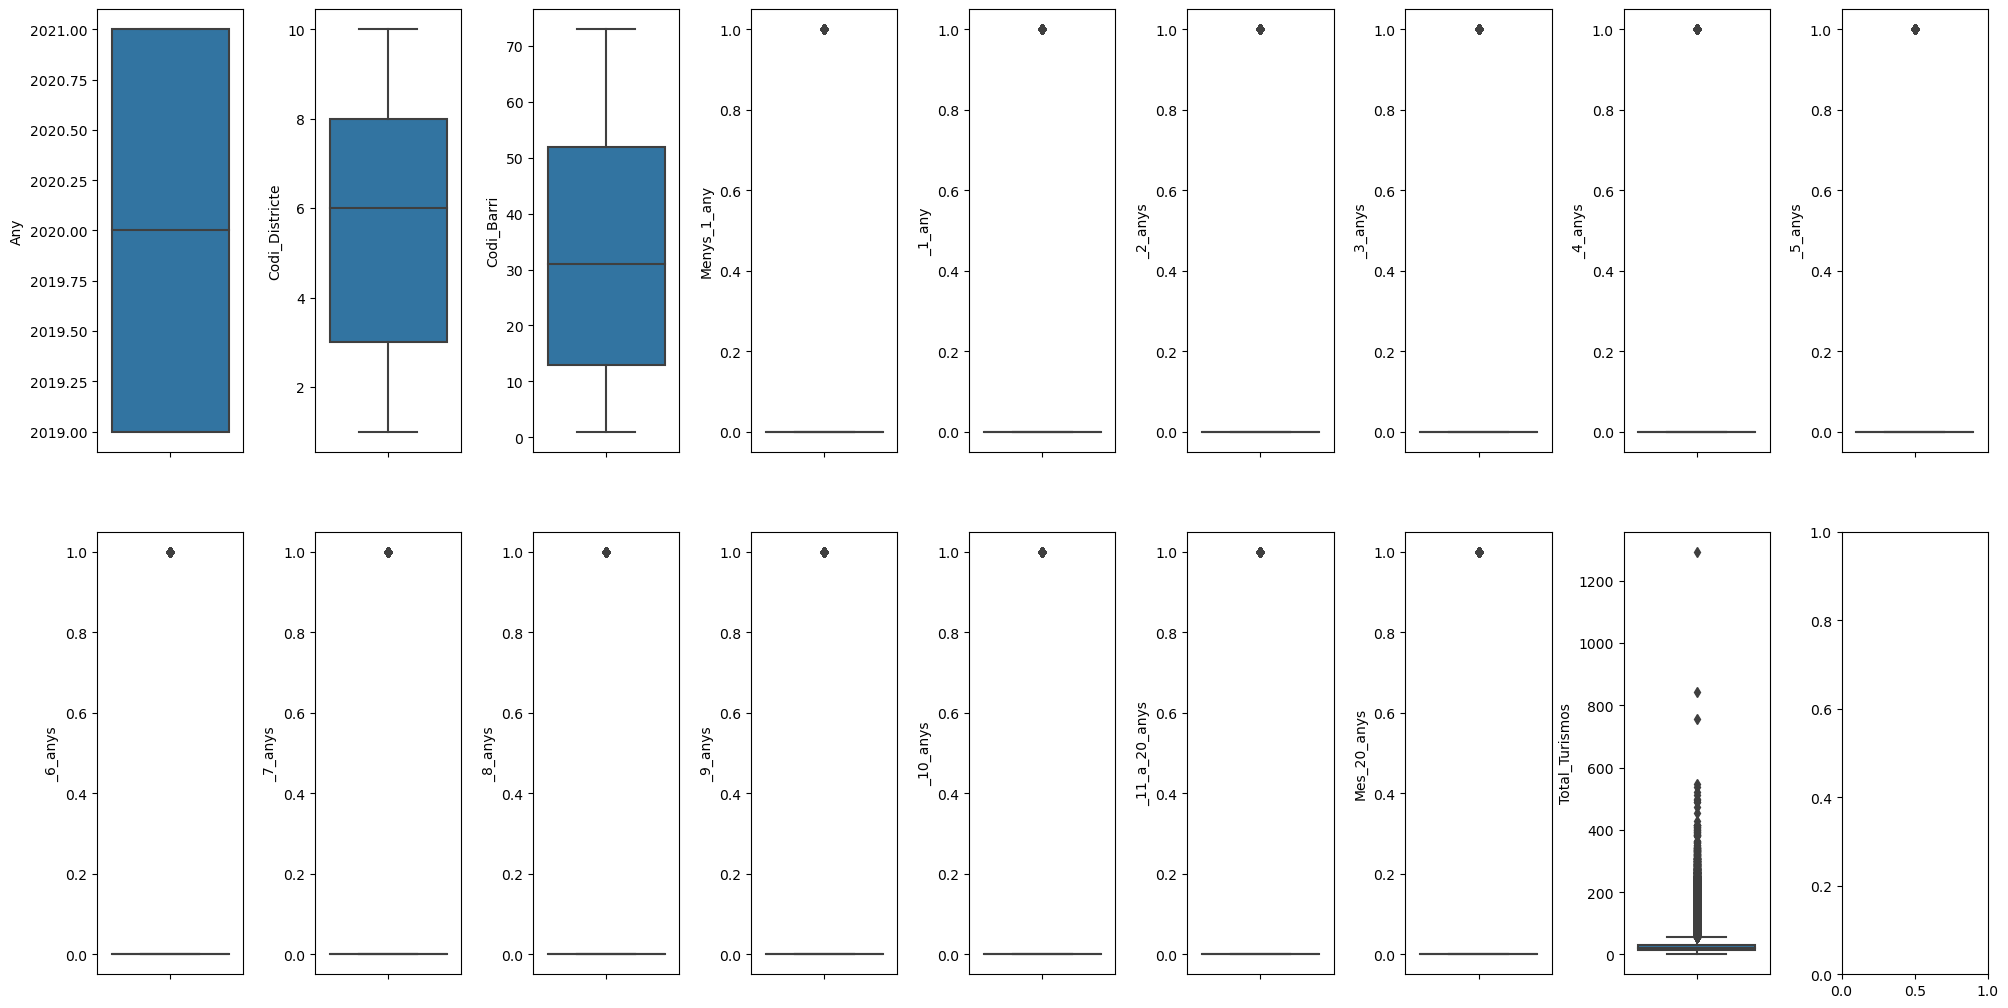

In [23]:
fig, axs = plt.subplots(ncols=9, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in BCN_df.items():
    sns.boxplot(y=k, data=BCN_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [24]:
# Escalamos los datos con Robustscaler para reducir el impacto de los valores atipicos (outliers) en el modelo

rb_scaler = RobustScaler()
x_rb_scaled = rb_scaler.fit_transform(BCN_df)
BCN_df_rb_escaled = pd.DataFrame(x_rb_scaled, columns=BCN_df.columns)

BCN_df_rb_escaled

,Any,Codi_Districte,Codi_Barri,Menys_1_any,_1_any,_2_anys,_3_anys,_4_anys,_5_anys,_6_anys,_7_anys,_8_anys,_9_anys,_10_anys,_11_a_20_anys,Mes_20_anys,Total_Turismos
0,-0.5,-1.0,-0.769231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058824
1,-0.5,-1.0,-0.769231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.588235
2,-0.5,-1.0,-0.769231,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058824
3,-0.5,-1.0,-0.769231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.176471
4,-0.5,-1.0,-0.769231,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41646,0.5,0.8,1.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.411765
41647,0.5,0.8,1.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.352941
41648,0.5,0.8,1.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.529412
41649,0.5,0.8,1.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.882353


#### TEST / TRAIN

In [25]:
X = BCN_df_rb_escaled.drop(['Total_Turismos'], axis=1) # eliminamos variable 'Total_Vehículos' (target)
y = BCN_df_rb_escaled['Total_Turismos'] # mantenemos la variable objetivo 'target'


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42) # Train = 70% / Test = 30%

In [26]:
# Estudiamos Train / Test a nivel descriptivo

print("Descriptivo conjunto X_train:", X_train.describe())

print("Descriptivo conjunto y_train:", y_train.describe())

print("Descriptivo conjunto X_test:", X_test.describe())

print("Descriptivo conjunto y_train:", y_test.describe())

Descriptivo conjunto X_train:                 Any  Codi_Districte    Codi_Barri   Menys_1_any        _1_any  \
count  29155.000000    29155.000000  29155.000000  29155.000000  29155.000000   
mean       0.002161       -0.055016      0.057650      0.076042      0.076076   
std        0.407633        0.587435      0.561169      0.265070      0.265124   
min       -0.500000       -1.000000     -0.769231      0.000000      0.000000   
25%       -0.500000       -0.600000     -0.461538      0.000000      0.000000   
50%        0.000000        0.000000      0.000000      0.000000      0.000000   
75%        0.500000        0.400000      0.538462      0.000000      0.000000   
max        0.500000        0.800000      1.076923      1.000000      1.000000   

            _2_anys       _3_anys       _4_anys       _5_anys       _6_anys  \
count  29155.000000  29155.000000  29155.000000  29155.000000  29155.000000   
mean       0.077620      0.076042      0.077517      0.076591      0.077037   
std

#### Modelo 1: Regresión Lineal

In [27]:
# Creamos modelo de Regresión Lineal

BCN_lr = LinearRegression()

In [28]:
# Entrenamos el modelo

BCN_lr.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicciones con el conjunto de prueba:

y_pred_BCN_lr = BCN_lr.predict(X_test)

y_pred_BCN_lr 

array([ 0.09585606, -0.21889889,  0.38913114, ...,  0.36119177,
       -0.06515305,  0.28741389])

In [30]:
import statsmodels.api as sm

# Agregar una columna de unos para representar el término independiente
X = sm.add_constant(X)

# Crear el modelo de regresión de statsmodels
model_sm = sm.OLS(y, X)

# Ajustar el modelo
results = model_sm.fit()

# Obtener un resumen del modelo
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:         Total_Turismos   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 1.013e+04
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:25:00   Log-Likelihood:                -68582.
No. Observations:               41651   AIC:                         1.372e+05
Df Residuals:                   41634   BIC:                         1.373e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.253e+09    3.9e+11     -0.

In [31]:
# Calculamos el error cuadrático medio (MSE)

BCN_lr_mse = mean_squared_error(y_test, y_pred_BCN_lr )

print(BCN_lr_mse)

1.7219524063233156


In [32]:
# Calculamos el coeficiente de determinación (R2)

BCN_lr_R2 = r2_score(y_test, y_pred_BCN_lr)

print(BCN_lr_R2)

0.7843620864606162


In [33]:
# Tratamos de mejorar el modelo utilizando el parametro positive=true

BCN_lr_parametro = LinearRegression(positive=True)

BCN_lr_parametro.fit(X_train, y_train)

y_pred_BCN_lr_parametro = BCN_lr_parametro.predict(X_test)

# MSE

BCN_lr_parametro_mse = mean_squared_error(y_test, y_pred_BCN_lr_parametro)

# R2

BCN_lr_parametro_R2 = r2_score(y_test, y_pred_BCN_lr_parametro)

print("MSE Regresión Lineal:", BCN_lr_mse)
print("R2 Regresión Lineal:", BCN_lr_R2)
print("MSE Regresión Lineal (parametro):", BCN_lr_parametro_mse)
print("R2 Regresión Lineal (parametro):", BCN_lr_parametro_R2)



MSE Regresión Lineal: 1.7219524063233156
R2 Regresión Lineal: 0.7843620864606162
MSE Regresión Lineal (parametro): 1.7231018004547332
R2 Regresión Lineal (parametro): 0.7842181492928856


In [34]:
# Calculamos el rango de la variable 'y'

columna = BCN_df_rb_escaled['Total_Turismos']

valor_maximo = max(columna)
valor_minimo = min(columna)

rango = valor_maximo - valor_minimo

print("El rango de la columna es:", rango)

El rango de la columna es: 76.0


#### Modelo 2: Regresión Polinómica

In [35]:
# Transformamos los datos de entrada

BCN_pr_transform = PolynomialFeatures(degree=2)  # Ajuste del grado
X_train_BCN_pr = BCN_pr_transform.fit_transform(X_train)
X_test_BCN_pr = BCN_pr_transform.transform(X_test)

In [36]:
# Creamos y ajustamos el modelo de regresión lineal
BCN_pr = LinearRegression()
BCN_pr.fit(X_train_BCN_pr, y_train)

LinearRegression()

In [37]:
# Predicción en el conjunto de prueba
y_pred_BCN_pr = BCN_pr.predict(X_test_BCN_pr)

y_pred_BCN_pr

array([ 0.18997574, -0.05764723,  0.46602869, ...,  0.55369043,
        0.20804071,  0.03711939])

In [38]:
# Cálculo del MSE
BCN_pr_mse = mean_squared_error(y_test, y_pred_BCN_pr)
print(BCN_pr_mse)

1.652747377670942


In [39]:
# Evaluación del modelo en el conjunto de prueba
BCN_pr_R2 = BCN_pr.score(X_test_BCN_pr, y_test)
print(BCN_pr_R2)

0.7930285443314786


#### Modelo 3: Random Forest

In [40]:
# Creamos el modelo Random Forest

BCN_rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [41]:
# Entrenamos el modelo

BCN_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Predicciones en el conjunto de prueba:

y_pred_BCN_rf= BCN_rf.predict(X_test)

y_pred_BCN_rf

array([-0.3003606 , -0.24470008,  0.90636242, ...,  0.1184749 ,
        0.26010245,  0.00614336])

In [43]:
# Calculamos el error cuadrático medio (MSE)

BCN_rf_mse = mean_squared_error(y_test, y_pred_BCN_rf)

print(BCN_rf_mse)

1.3446911427729904


In [44]:
# Calculamos el coeficiente de determinación (R2)

BCN_rf_R2 = r2_score(y_test, y_pred_BCN_rf)

print(BCN_rf_R2)

0.8316060354992106


In [45]:
# Tratamos de mejorar el modelo modificando el parametro n_estimators

BCN_rf_parametro = RandomForestRegressor(n_estimators=125, random_state=42)

BCN_rf_parametro.fit(X_train, y_train)

y_pred_BCN_rf_parametro = BCN_rf_parametro.predict(X_test)

# MSE

BCN_rf_parametro_mse = mean_squared_error(y_test, y_pred_BCN_rf_parametro)

# R2

BCN_rf_parametro_R2 = r2_score(y_test, y_pred_BCN_rf_parametro)

print("MSE Random Forest:", BCN_rf_mse)
print("R2 Random Forest:", BCN_rf_R2)
print("MSE Random Forest (parametro):", BCN_rf_parametro_mse)
print("R2 Random Forest (parametro):", BCN_rf_parametro_R2)

MSE Random Forest: 1.3446911427729904
R2 Random Forest: 0.8316060354992106
MSE Random Forest (parametro): 1.3443569152122121
R2 Random Forest (parametro): 0.8316478903922895


----------------------------------------------------------------------------------------------------------------------------

Comparamos los __MSE__ y __R2__ de los modelos generados

In [46]:
Comp_modelos = pd.DataFrame( data = [('Linear Regression', BCN_lr_mse, BCN_lr_R2), 
                                  ('Polynomial Regression', BCN_pr_mse, BCN_pr_R2), 
                                  ('Random Forest', BCN_rf_mse, BCN_rf_R2),
                                  ('Linear Regression (parameter)',BCN_lr_parametro_mse,BCN_lr_parametro_R2),
                                  ('Random Forest (parameter)', BCN_rf_parametro_mse,BCN_rf_parametro_R2)],
                                  columns = ['Modelo', 'MSE', 'R2'])

Comp_modelos

,Modelo,MSE,R2
0,Linear Regression,1.721952,0.784362
1,Polynomial Regression,1.652747,0.793029
2,Random Forest,1.344691,0.831606
3,Linear Regression (parameter),1.723102,0.784218
4,Random Forest (parameter),1.344357,0.831648


Comparando los resultados, podemos observar lo siguiente:

- El modelo de Random Forest (parameter) tiene el MSE más bajo entre todos los modelos, lo que indica un mejor ajuste a los datos en términos de error cuadrático medio. Aunque es muy similar al Random Forest (Inicial)

- En términos del coeficiente de determinación R2, tanto el modelo de Random Forest (parameter) como el modelo de Random Forest tienen valores altos, lo que sugiere que estos modelos explican una gran parte de la variabilidad en los datos.

- El modelo de Polynomial Regression tiene un MSE y R2 ligeramente más bajos en comparación con los modelos de Linear Regression y Linear Regression (parameter), lo que indica un mejor rendimiento en este conjunto de datos específico.

En general, los modelos de __Polynomial Regression__ y __Random Forest__ parecen tener un desempeño mejor que el modelo de regresión lineal básico. El modelo de Random Forest muestra el MSE más bajo y el coeficiente de determinación (R2) más alto, lo que indica que es el modelo que se ajusta mejor a tus datos y puede hacer predicciones más precisas.







#### Cross Validation

Habiendo analizado los modelos comparamos con Cross Validation los dos mejores:

   - Polynomial Regression
   - Random Forest

In [47]:
# Definimos la estrategia de Cross Validation (k-fold Cross Validation con k=5)
kfold = KFold(n_splits=5)

# Modelo de Polynomial Regression
 
BCN_pr_CV = cross_val_score(BCN_pr, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Modelo Random Forest
 
BCN_rf_CV = cross_val_score(BCN_rf, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Calculams el MSE promedio para cada modelo
BCN_pr_mse_mean = -BCN_pr_CV.mean()
BCN_rf_mse_mean = -BCN_rf_CV.mean()

# Resultados
print("Polynomial Regression MSE mean:", BCN_pr_mse_mean)
print("Random Forest MSE mean:", BCN_rf_mse_mean)

Polynomial Regression MSE mean: 1.5941116005025326
Random Forest MSE mean: 1.0395108348982172


#### Comentarios:

- Habiendo analizado los modelos, hemos conlcluido que los mejores modelos son Polynomial Regression y Random Forest.
- Después de realiza Cross Validation, podemos concluir que el modelo __Random Forest__ es el más ajustado.

-------------------------------------------------------------------------------------------------------------------------------

#### PREDICCIÓN

Generamos el modelo de predicción para poder determinar el Total de vehículos en función del año y las distintas variables de Antigüedad:

In [54]:
# Datos de entrada:

Any = float(input('Introduce año: '))
Codi_Districte = float(input('Codigo Disrito: '))
Codi_Barri = float(input('Codigo Barrio: '))
Menys_1_any = float(input('Menys de un any de antiguitat:'))             
_1_any = float(input('1 any:'))
_2_anys = float(input('2 anys:'))
_3_anys = float(input('3 anys:'))
_4_anys = float(input('4 anys:'))
_5_anys = float(input('5 anys:'))
_6_anys = float(input('6 anys:'))
_7_anys = float(input('7 anys:'))
_8_anys = float(input('8 anys:'))
_9_anys = float(input('9 anys:'))
_10_anys = float(input('10 anys:'))
_11_a_20_anys = float(input('De 11 a 20 anys:'))
Mes_20_anys = float(input('Més de 20 anys:'))


# Creamos la matriz a partir de los datos de entrada

new_data = np.array([[Any, Codi_Districte, Codi_Barri, Menys_1_any, _1_any, _2_anys, _3_anys, _4_anys, _5_anys, _6_anys, _7_anys, _8_anys, _9_anys, _10_anys, _11_a_20_anys, Mes_20_anys]])

new_data = new_data.reshape(1, -1)

# Hacemos predicción:

feature_names = ['Any', 'Codi_Districte', 'Codi_Barri', 'Menys_1_any', '_1_any', '_2_anys', '_3_anys', '_4_anys', '_5_anys', '_6_anys', '_7_anys', '_8_anys', '_9_anys', '_10_anys', '_11_a_20_anys', 'Mes_20_anys']

X_predict = pd.DataFrame(new_data, columns=feature_names)

predicted_total_vehicles = BCN_rf.predict(X_predict)

predicted_total_vehicles 



Introduce año: 2022
Codigo Disrito: 1
Codigo Barrio: 1
Menys de un any de antiguitat:1
1 any:1
2 anys:1
3 anys:0
4 anys:0
5 anys:0
6 anys:0
7 anys:0
8 anys:0
9 anys:0
10 anys:0
De 11 a 20 anys:0
Més de 20 anys:0


array([0.31455024])